# Regresión multivariable

Obtenemos datos de ventas de coches (ficticios)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

df = pd.read_csv('./datos/Advertising.csv')

scale = StandardScaler()

X = df[['TV', 'radio', 'newspaper']]
y = df[['sales']] #el resultado es una Serie
X[['TV', 'radio', 'newspaper']] = scale.fit_transform(X.to_numpy())
X = sm.add_constant(X) #Añade una columna de 1nos para poder obtener B, la ordenada al origen
est = sm.OLS(y, X).fit()
est.summary()




/var/folders/y5/ts3kf20x52bgymr4_zgtyp980000gn/T/ipykernel_2182/3624548332.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['TV', 'radio', 'newspaper']] = scale.fit_transform(X.to_numpy())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           1.58e-96
Time:                        15:46:28   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0225      0.119    117.655      0.000      13.787      14.258
TV             3.9193      0.119     32.809      0.000       3.684       4.155
radio          2.7921      0.128     21.893      0.000       2.541       3.044
newspaper     -0.0225      0.128     -0.177      0.860      -0.274       0.229
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         1.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2]:

lines = df['TV'].count()
print(lines)
value = lines * 0.8
value2 = lines * 0.2
train = df.sample(frac=0.8,random_state=42)
test = df.drop(train.index)
train.head()

200


,Unnamed: 0,TV,radio,newspaper,sales
95,96,163.3,31.6,52.9,16.9
15,16,195.4,47.7,52.9,22.4
30,31,292.9,28.3,43.2,21.4
158,159,11.7,36.9,45.2,7.3
128,129,220.3,49.0,3.2,24.7


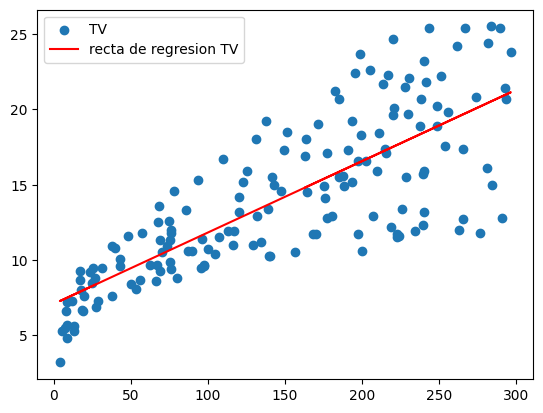

cuoficionete de determinacion:0.6224477702146687


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats

scale = StandardScaler()

X = train[['TV', 'radio', 'newspaper']] # con doble corchete el resultado es otro DF
X_scaled = scale.fit_transform(X)
y = train[['sales']] #el resultado es una Serie
X = sm.add_constant(X) #Añade una columna de 1nos para poder obtener B, la ordenada al origen
slope, intercept, r_value, p_value, std_err = stats.linregress(X['TV'],y['sales'])

plt.scatter(X['TV'],y['sales'],label = 'TV' )
plt.plot(X['TV'] ,slope * X['TV'] + intercept, color="red",label='recta de regresion TV')
plt.legend()
plt.show()

print(f"cuoficionete de determinacion:{r_value ** 2}") 

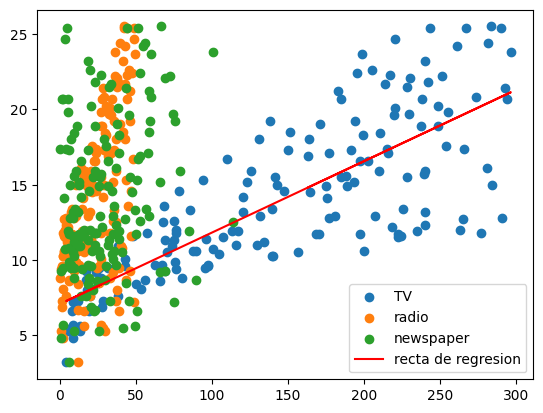

In [4]:
plt.scatter(X['TV'],y['sales'],label = 'TV' )
plt.scatter(X['radio'],y['sales'],label = 'radio')
plt.scatter(X['newspaper'],y['sales'],label = 'newspaper')
plt.plot(X['TV'] ,slope * X['TV'] + intercept, color="red",label='recta de regresion')
plt.legend()
plt.show()


##test

R² (test): 0.860
RMSE (test): 1.976

Coeficientes del modelo:
TV: 0.046
radio: 0.191
newspaper: -0.007
Intercepto: 3.102


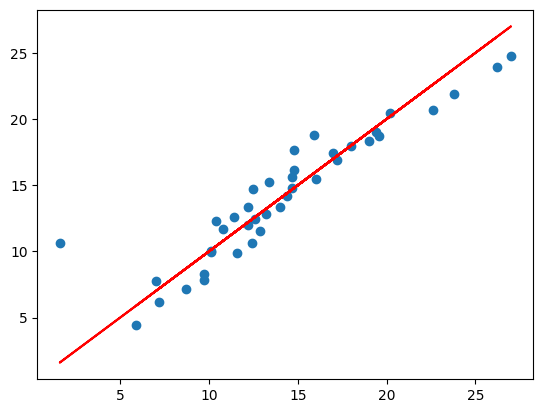

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Variables
X_train = train[['TV', 'radio', 'newspaper']]
y_train = train['sales']

X_test = test[['TV', 'radio', 'newspaper']]
y_test = test['sales']

# Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test).ravel()

# Métricas
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(f"R² (test): {r2:.3f}")
print(f"RMSE (test): {rmse:.3f}")

# Coeficientes
print("\nCoeficientes del modelo:")
for name, coef in zip(X_train.columns, modelo.coef_):
    print(f"{name}: {coef:.3f}")

print(f"Intercepto: {modelo.intercept_:.3f}")
plt.plot(y_test,y_test,color='red')
plt.scatter(y_test,y_pred)
plt.show()
